In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
%matplotlib inline

In [2]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)


10000

In [5]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

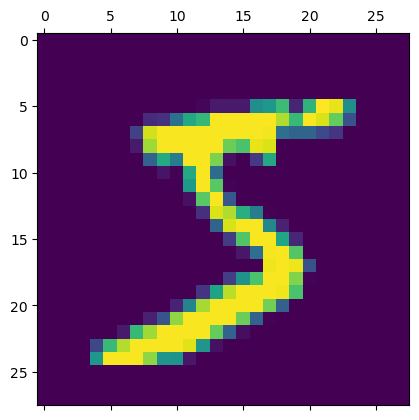

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

<img src="nnimage.png" alt="Alt text" width="700" height="500" />


In [29]:
#creating a simple neural network
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid") #10 is output which is on the right side in img and 784 is input
    
])

In [30]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [31]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4701 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3046 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2837 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9255


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2662 - accuracy: 0.9265


[0.26622259616851807, 0.9265000224113464]

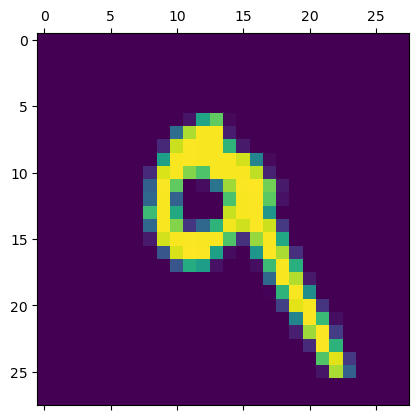

In [33]:
plt.matshow(X_test[7])

In [34]:
ypredicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [35]:
ypredicted[7]

array([1.8435803e-06, 2.6961476e-01, 2.0740451e-02, 3.5891809e-02,
       3.1893033e-01, 2.2117493e-01, 1.1046955e-03, 2.5991511e-02,
       1.3037932e-01, 9.7419840e-01], dtype=float32)

In [36]:
np.argmax(ypredicted[7])

9

In [37]:
y_predicted_labels=[np.argmax(i) for i in ypredicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    8,  932,   16,    7,    1,   11,   10,   34,    5],
       [   4,    0,   22,  924,    0,   16,    2,   13,   23,    6],
       [   2,    1,    6,    2,  913,    0,    7,    4,    9,   38],
       [  11,    3,    6,   41,   11,  758,   13,    7,   35,    7],
       [  16,    3,    9,    1,    8,   10,  906,    2,    3,    0],
       [   1,    7,   23,    5,    5,    0,    0,  957,    1,   29],
       [   7,    8,    7,   20,    9,   20,    8,   13,  874,    8],
       [  10,    7,    2,   10,   24,    6,    0,   26,    6,  918]])>

Text(58.222222222222214, 0.5, 'Truth')

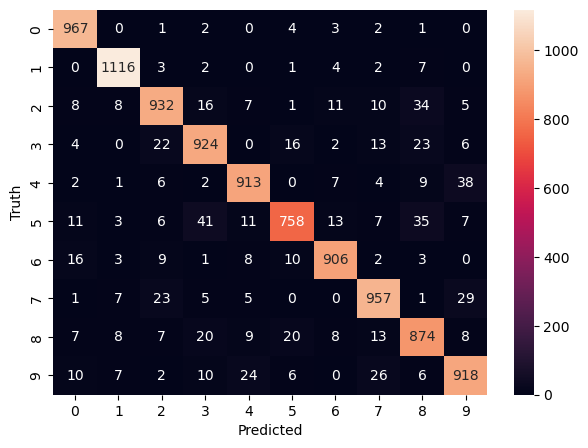

In [44]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')